In [2]:
import tensorflow as tf
from tensorflow.keras.models import load_model
import numpy as np
datatestnocrop = r"D:\InceptionNet\DATATEST100 class\100classtestnocrop"
datacob = r"D:\InceptionNet\mediamdata"
#C:\InceptionNet\mediamdata 

In [3]:
def Nornal224S(image_path):
    """
    รับที่อยู่ไฟล์รูปภาพ แล้วโหลด, ปรับขนาด, และทำ preprocessing
    """
    # 1. อ่านไฟล์รูปภาพจากที่อยู่ (path)
    img = tf.io.read_file(image_path)
    
    # 2. ถอดรหัสไฟล์ให้เป็น tensor ของรูปภาพ
    img = tf.image.decode_jpeg(img, channels=3)
    # 3. ปรับขนาดรูปภาพ (Resize)
    img = tf.image.resize(img, [224, 224])
    # 4. แปลงประเภทข้อมูลและทำ Normalization
    img = tf.cast(img, tf.float32)
    img = img / 255.0  # Normalization
    img = tf.clip_by_value(img, 0.0, 1.0)
    # 5. กำหนด shape เพื่อป้องกัน error
    img.set_shape((224, 224, 3))
    
    return img

In [4]:
model44 = load_model(r'D:\final_facenet\model\CA_70EA_70$$C078_E065.h5')

In [5]:
import os
def loadclass(dataset_path):
    
    #สร้าง dictionary 
    class_image_paths = {}
    for class_name in os.listdir(dataset_path): #os.listdir ดึงรายชื่อไฟล์/โฟเดอร์ใน paht
        class_dir = os.path.join(dataset_path, class_name)#os.path.join = images\photo.jpg
        #print(class_dir)
        if os.path.isdir(class_dir):#ตรวจสอบclass_dir เป็นโฟลเดอร์ถ้าเป็นโฟลเดอร์ จะเข้าไปทำงานต่อ
            image_files = [ 
                os.path.join(class_dir, img) #
                for img in os.listdir(class_dir) # ดึงรายชื่อ
                if img.lower().endswith(('.jpg', '.jpeg', '.png')) #
            ]
            if len(image_files) >= 2:  # ขั้นต่ำ 3 ภาพผป
                class_image_paths[class_name] = image_files # สร้าง dictionary

    return class_image_paths

In [6]:
data = loadclass(datatestnocrop)

In [7]:
print(len(data))

101


In [8]:
classes = list(data.keys())

In [9]:
print(classes)

['101680', '101917', '103158', '1064', '106807', '1074', '10852', '108520', '112586', '117062', '120419', '123634', '126232', '127693', '130661', '13458', '136469', '138696', '139360', '139462', '145444', '161193', '162577', '163911', '164330', '166794', '173900', '176547', '176820', '180614', '182838', '193428', '195737', '2003', '200374', '202306', '202728', '215202', '215808', '220549', '222506', '224257', '225925', '233751', '235249', '237834', '241278', '243626', '250725', '253386', '260543', '260934', '261136', '264885', '267875', '272243', '272945', '273806', '274869', '27848', '27896', '280309', '281494', '281965', '290618', '293528', '293748', '29493', '30787', '310600', '330507', '33206', '333381', '334241', '335616', '336343', '344825', '349511', '351592', '358', '37083', '37417', '38840', '40106', '4059', '42639', '47244', '51808', '65088', '70269', '70772', '73790', '79538', '79916', '80004', '8966', '90382', '9322', '93387', '95217', '99626']


In [10]:
smae_eculidean = []
smae_cosine = []
smae_embedding1 = []
smae_embedding2 = []

sameeculidean = 0
samecosine = 0
intx = 0
for image in classes:
    pathim = data[image]
    intx = intx+1
    if len(pathim) >=2:
        img1_path = pathim[0]
        img2_path = pathim[1]
        img1 = Nornal224S(img1_path)
        img2 = Nornal224S(img2_path)
        img1 = tf.expand_dims(img1, axis=0)
        img2 = tf.expand_dims(img2, axis=0)
        em1 = model44.predict(img1).squeeze()
        em2 = model44.predict(img2).squeeze()
        #embedding1 = model.predict(tf.expand_dims(img1, axis=0))[0]
        #embedding2 = model.predict(tf.expand_dims(img2, axis=0))[0]
        smae_embedding1.append(em1)
        smae_embedding2.append(em2)
        euclidean_dist = np.linalg.norm(em1 - em2)
        smae_eculidean.append(euclidean_dist)

        dot_product = np.dot(em1, em2)
        norm_product = np.linalg.norm(em1) * np.linalg.norm(em2)
        cosine_sim = dot_product / (norm_product + 1e-8)
        smae_cosine.append(cosine_sim)



1/1 [==============================] - 0s 40ms/step


In [11]:
#print(embedding1)
print(type(smae_embedding1[0]))

<class 'numpy.ndarray'>


In [12]:
import random

negative_pairs = []

classes_list = list(data.keys())  # data = dict ที่มี key = class_name

num_negatives = 100  # จะสร้างกี่คู่ negative

for _ in range(num_negatives):
    # เลือก 2 class ต่างกัน
    class1, class2 = random.sample(classes_list, 2)
    
    # เลือกภาพ 1 ใบจากแต่ละ class
    img1_path = random.choice(data[class1])
    img2_path = random.choice(data[class2])
    
    # เพิ่มเข้าลิส
    negative_pairs.append((img1_path, img2_path))


In [13]:
euclidean_diff = []
cosine_diff = []
diff_embedding1 =[]
diff_embedding2 =[]

for img1_path, img2_path in negative_pairs:
    img1 = Nornal224S(img1_path)
    img2 = Nornal224S(img2_path)
    
    img1 = tf.expand_dims(img1, axis=0)
    img2 = tf.expand_dims(img2, axis=0)
    
    em1 = model44.predict(img1)[0]  #ตัด batch
    em2 = model44.predict(img2)[0]
    diff_embedding1.append(em1)
    diff_embedding2.append(em2)
    # Euclidean
    euclidean_dist = np.linalg.norm(em1 - em2)
    euclidean_diff.append(euclidean_dist)
    
    # Cosine
    dot_product = np.dot(em1, em2)
    norm_product = np.linalg.norm(em1) * np.linalg.norm(em2)
    cosine_sim = dot_product / (norm_product + 1e-8)
    cosine_diff.append(cosine_sim)


1/1 [==============================] - 0s 40ms/step


In [14]:
print(cosine_diff)
print(euclidean_diff)

[0.5789659906525383, 0.718139428841773, 0.47151129796533753, 0.9406969382507275, 0.8348896917592552, 0.5927025130966929, 0.6010135114300356, 0.7223762201550831, 0.7137188498792377, 0.728683166369632, 0.5895480209969446, 0.8018255153582098, 0.8458193455991186, 0.8534809861665756, 0.701496337878989, 0.7717347527896848, 0.9370838831037985, 0.8458945574746728, 0.8727518677163284, 0.38655917097714393, 0.7502558305797249, 0.7635243317738893, 0.837238760829697, 0.7421138212379195, 0.7462543476993204, 0.8280977523963602, 0.768624820689617, 0.7097849005879613, 0.6417721872797084, 0.6122425271134259, 0.7108174491372479, 0.8610904130657316, 0.7166858502108912, 0.7399973795323993, 0.6855092388689442, 0.7069408226844676, 0.683980401586791, 0.7454765657116721, 0.7931780982357622, 0.9221243673289977, 0.7155588793724263, 0.7207298636324082, 0.7961742798342778, 0.8808003433839625, 0.8600705179991789, 0.8701673581705988, 0.8718897017074336, 0.6830295663139951, 0.8060815484880722, 0.8190271664629704, 0.7

In [15]:
print(smae_cosine)
print(smae_eculidean)

[0.8898209774812335, 0.9219017486114681, 0.8559537954538213, 0.7620670719233967, 0.9095981626149865, 0.8581316727652796, 0.7710467822988856, 0.8076847710903277, 0.8360253987171418, 0.9434024563506715, 0.8800340731375728, 0.9361805188128645, 0.8535875505435063, 0.8708583029445542, 0.6202857802044806, 0.8714998720160918, 0.8854176909596659, 0.9334324465291779, 0.8947029149823147, 0.7988321461464463, 0.8981788543265046, 0.8702409621763061, 0.782701663296488, 0.8108516850448646, 0.8883308016832843, 0.8842353067329668, 0.7991745392036892, 0.7557057967558621, 0.8705942908359401, 0.7632666012770959, 0.752640269935635, 0.7364839241766037, 0.7284606946029178, 0.8365276177352183, 0.8859165154268972, 0.8756578402964372, 0.9154446033486058, 0.8235532944761081, 0.9241826351471635, 0.8774787622846516, 0.9043156357167152, 0.7777531400335405, 0.9356601144684722, 0.7145461198487981, 0.8152007975120545, 0.8202448190972443, 0.883231213797235, 0.823791962002671, 0.9589718459894101, 0.8155303405944737, 0.9

In [16]:
import matplotlib.pyplot as plt

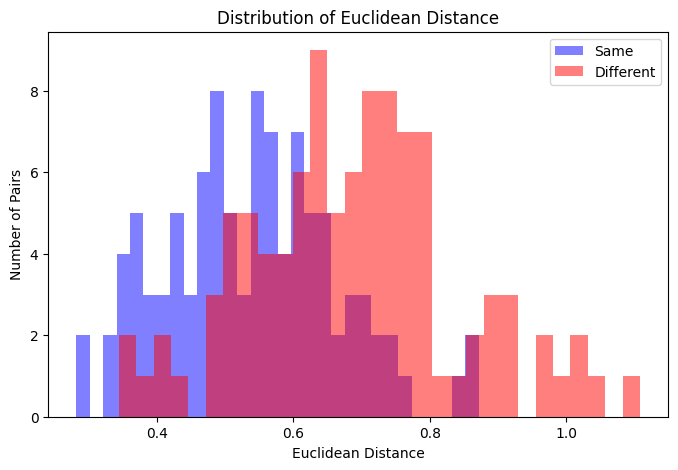

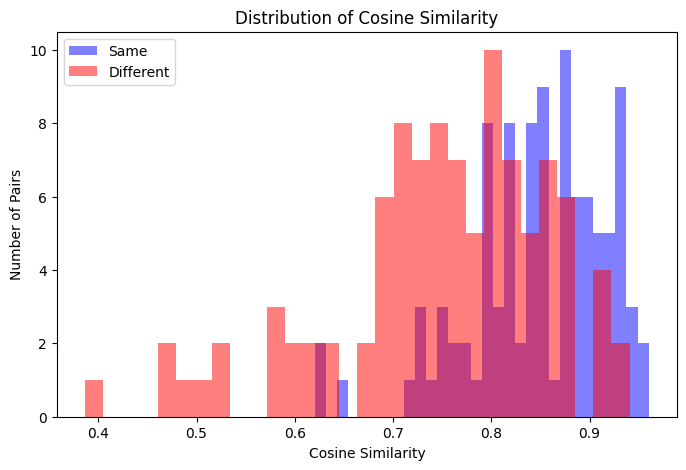

In [17]:
#eculidean
plt.figure(figsize=(8,5))
plt.hist(smae_eculidean, bins=30, alpha=0.5, label='Same', color='blue')
plt.hist(euclidean_diff, bins=30, alpha=0.5, label='Different', color='red')
plt.title("Distribution of Euclidean Distance")
plt.xlabel("Euclidean Distance")
plt.ylabel("Number of Pairs")
plt.legend()
plt.show()

#cosine
plt.figure(figsize=(8,5))
plt.hist(smae_cosine, bins=30, alpha=0.5, label='Same', color='blue')
plt.hist(cosine_diff, bins=30, alpha=0.5, label='Different', color='red')
plt.title("Distribution of Cosine Similarity")
plt.xlabel("Cosine Similarity")
plt.ylabel("Number of Pairs")
plt.legend()
plt.show()


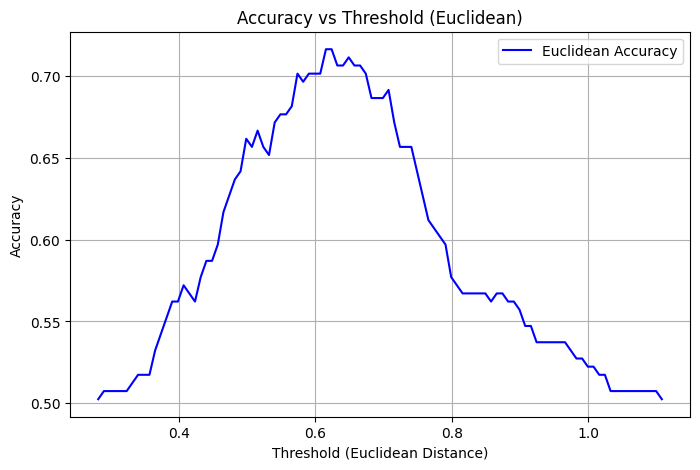

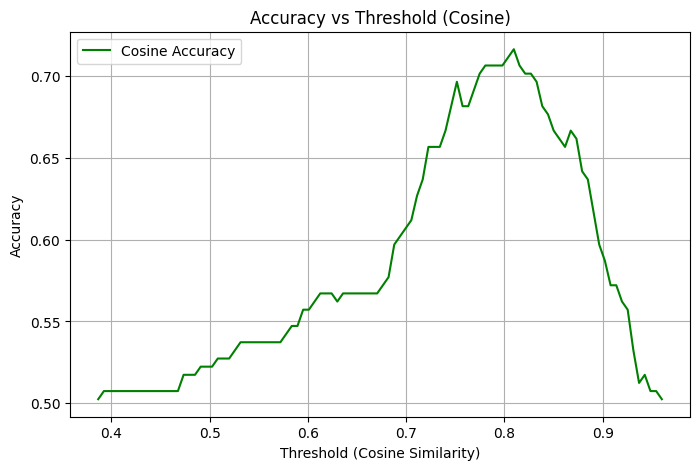

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# สมมติว่าคุณมี
# euclidean_same, euclidean_diff, cosine_same, cosine_diff

def accuracy_vs_threshold(distance_same, distance_diff, metric_type='euclidean'):
    all_values = distance_same + distance_diff  # สำหรับหา range threshold
    min_val, max_val = min(all_values), max(all_values)
    
    thresholds = np.linspace(min_val, max_val, 100)
    accuracies = []

    for t in thresholds:
        if metric_type == 'euclidean':
            # Euclidean: smaller = same
            correct_same = np.sum(np.array(distance_same) <= t)
            correct_diff = np.sum(np.array(distance_diff) > t)
        elif metric_type == 'cosine':
            # Cosine: larger = same
            correct_same = np.sum(np.array(distance_same) >= t)
            correct_diff = np.sum(np.array(distance_diff) < t)
        else:
            raise ValueError("metric_type must be 'euclidean' or 'cosine'")
        
        acc = (correct_same + correct_diff) / (len(distance_same) + len(distance_diff))
        accuracies.append(acc)
    
    return thresholds, accuracies

# -----------------------------
# Plot Euclidean Accuracy vs Threshold
# -----------------------------
thresholds_euc, acc_euc = accuracy_vs_threshold(smae_eculidean, euclidean_diff, 'euclidean')

plt.figure(figsize=(8,5))
plt.plot(thresholds_euc, acc_euc, label='Euclidean Accuracy', color='blue')
plt.xlabel('Threshold (Euclidean Distance)')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Threshold (Euclidean)')
plt.grid(True)
plt.legend()
plt.show()

# -----------------------------
# Plot Cosine Accuracy vs Threshold
# -----------------------------
thresholds_cos, acc_cos = accuracy_vs_threshold(smae_cosine, cosine_diff, 'cosine')

plt.figure(figsize=(8,5))
plt.plot(thresholds_cos, acc_cos, label='Cosine Accuracy', color='green')
plt.xlabel('Threshold (Cosine Similarity)')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Threshold (Cosine)')
plt.grid(True)
plt.legend()
plt.show()


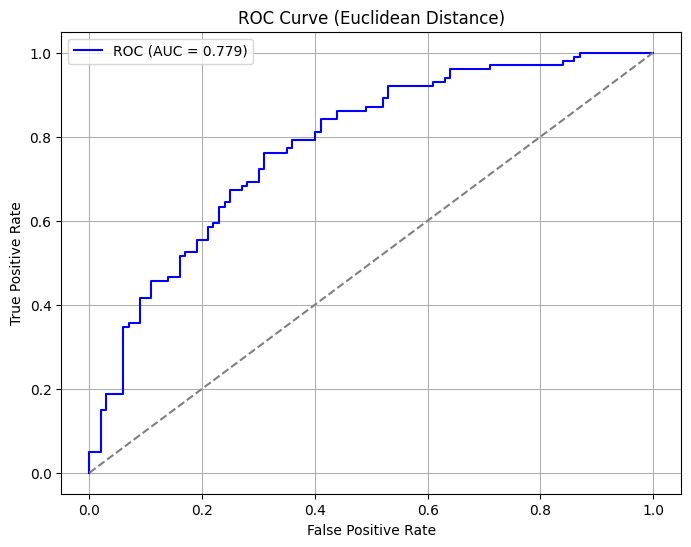

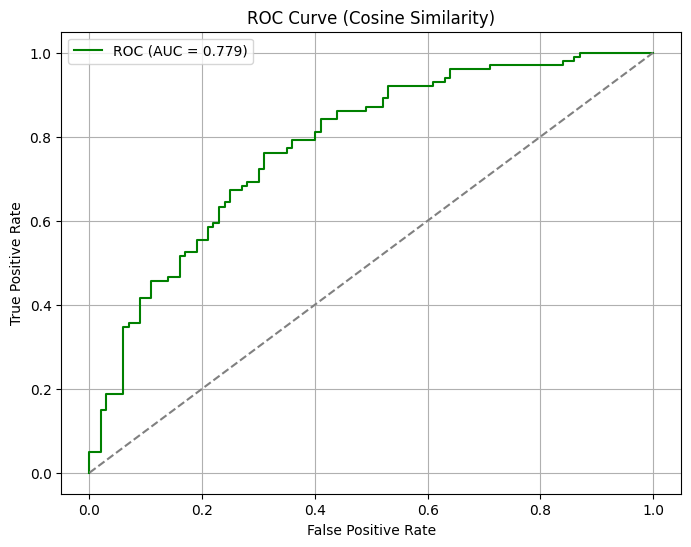

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score



y_true_euc = [1]*len(smae_eculidean) + [0]*len(euclidean_diff)  # 1 = same, 0 = different
y_score_euc = [-d for d in smae_eculidean] + [-d for d in euclidean_diff]  # Euclidean: smaller distance = more likely same

y_true_cos = [1]*len(smae_cosine) + [0]*len(cosine_diff)
y_score_cos = list(smae_cosine) + list(cosine_diff)  # Cosine: larger similarity = more likely same


fpr_euc, tpr_euc, thresholds_euc = roc_curve(y_true_euc, y_score_euc)
auc_euc = roc_auc_score(y_true_euc, y_score_euc)

plt.figure(figsize=(8,6))
plt.plot(fpr_euc, tpr_euc, color='blue', label=f'ROC (AUC = {auc_euc:.3f})')
plt.plot([0,1],[0,1],'--', color='gray')  # เส้นสุ่ม
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Euclidean Distance)')
plt.legend()
plt.grid(True)
plt.show()


fpr_cos, tpr_cos, thresholds_cos = roc_curve(y_true_cos, y_score_cos)
auc_cos = roc_auc_score(y_true_cos, y_score_cos)

plt.figure(figsize=(8,6))
plt.plot(fpr_cos, tpr_cos, color='green', label=f'ROC (AUC = {auc_cos:.3f})')
plt.plot([0,1],[0,1],'--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Cosine Similarity)')
plt.legend()
plt.grid(True)
plt.show()


eucdent_theshold = 0.62
cosins_theshold = 0.78

thebest EP44
eucdent_theshold = 0.65
cosins_theshold = 0.78

In [20]:
from sklearn.metrics import precision_score

In [21]:
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_auc_score


y_true = [1]*len(smae_eculidean) + [0]*len(euclidean_diff)
y_pred_euc = [1 if d <= 0.60 else 0 for d in smae_eculidean + euclidean_diff]

# Cosine: larger similarity = same
y_pred_cos = [1 if s >= 0.80 else 0 for s in smae_cosine + cosine_diff]

# ==== Euclidean metrics ====
acc_euc = accuracy_score(y_true, y_pred_euc)
prec_euc = precision_score(y_true, y_pred_euc)
rec_euc = recall_score(y_true, y_pred_euc)
f1_euc = f1_score(y_true, y_pred_euc)
auc_euc = roc_auc_score(y_true, [-d for d in smae_eculidean + euclidean_diff])  # note: -distance

# ==== Cosine metrics ====
acc_cos = accuracy_score(y_true, y_pred_cos)
prec_cos = precision_score(y_true, y_pred_cos)
rec_cos = recall_score(y_true, y_pred_cos)
f1_cos = f1_score(y_true, y_pred_cos)
auc_cos = roc_auc_score(y_true, smae_cosine + cosine_diff)

# ==== แสดงผล ====
print("=== Euclidean Metrics ===")
print(f"Accuracy: {acc_euc:.4f}, Precision: {prec_euc:.4f}, Recall: {rec_euc:.4f}, F1-score: {f1_euc:.4f}, AUC: {auc_euc:.4f}")

print("\n=== Cosine Metrics ===")
print(f"Accuracy: {acc_cos:.4f}, Precision: {prec_cos:.4f}, Recall: {rec_cos:.4f}, F1-score: {f1_cos:.4f}, AUC: {auc_cos:.4f}")


=== Euclidean Metrics ===
Accuracy: 0.7065, Precision: 0.7188, Recall: 0.6832, F1-score: 0.7005, AUC: 0.7786

=== Cosine Metrics ===
Accuracy: 0.7065, Precision: 0.6875, Recall: 0.7624, F1-score: 0.7230, AUC: 0.7786


=== Euclidean Metrics ===
Accuracy: 0.7313, Precision: 0.6911, Recall: 0.8416, F1-score: 0.7589, AUC: 0.8104

=== Cosine Metrics ===
Accuracy: 0.7264, Precision: 0.6825, Recall: 0.8515, F1-score: 0.7577, AUC: 0.8104